# Steel plate faults Data Analysis 



## Einleitung

Der Datensatz ist auf der Webseite https://archive.ics.uci.edu/ml/datasets/steel+plates+faults verfügbar.


Der Datensatz bestand aus 27 Parametern, die ungefähr die geometrische Form des Defekts/der Fehler beschreiben

X_Minimum

X_Maximum

Y_Minimum

Y_Maximum

Pixels_Areas

X_Perimeter

Y_Perimeter

Sum_of_Luminosity

Minimum_of_Luminosity

Maximum_of_Luminosity

Length_of_Conveyer

TypeOfSteel_A300

TypeOfSteel_A400

Steel_Plate_Thickness

Edges_Index

Empty_Index

Square_Index

Outside_X_Index

Edges_X_Index

Edges_Y_Index

Outside_Global_Index

LogOfAreas

Log_X_Index

Log_Y_Index

Orientation_Index

Luminosity_Index

SigmoidOfAreas

Der Datensatz enthält 7 Fehler (7 Spalten), die wie folgt lauten:
Pastry
Z_Scratch
K_Scatch
Stains
Dirtiness
Bumps
Other_Faults

## notwendige Bibliotheken

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly as py
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from IPython.display import Image

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier as RF

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('faults.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [5]:
pd.options.display.max_columns = None
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [6]:
pd.options.display.max_columns = None
display(df.describe(include="all"))

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,1459.160227,0.400309,0.599691,78.737764,0.331715,0.414203,0.570767,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,144.577823,0.490087,0.490087,55.086032,0.299712,0.137261,0.271058,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.060400,0.315800,0.361300,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,70.000000,0.227300,0.412100,0.555600,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,1650.000000,1.000000,1.000000,80.000000,0.573800,0.501600,0.818200,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


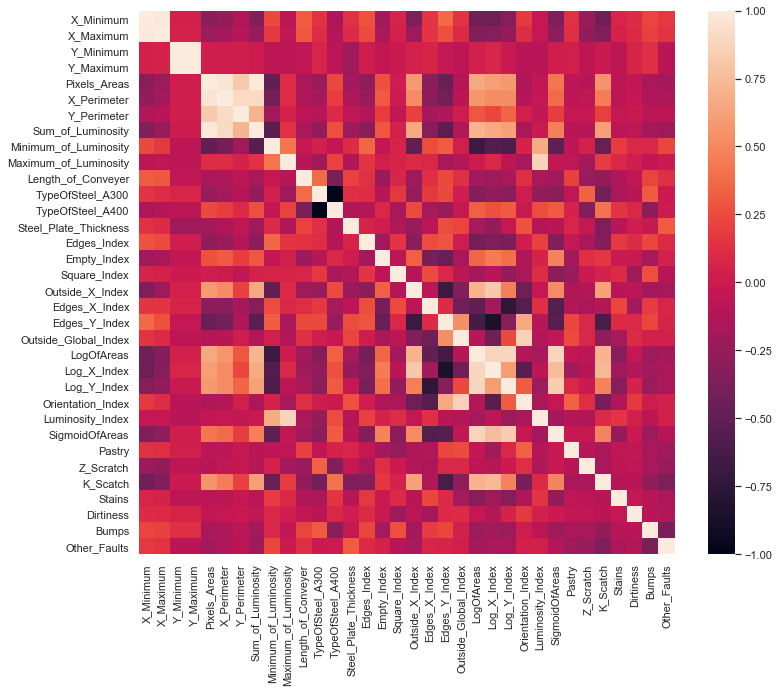

In [7]:
sns.set(rc={'figure.figsize':(12,10)})
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

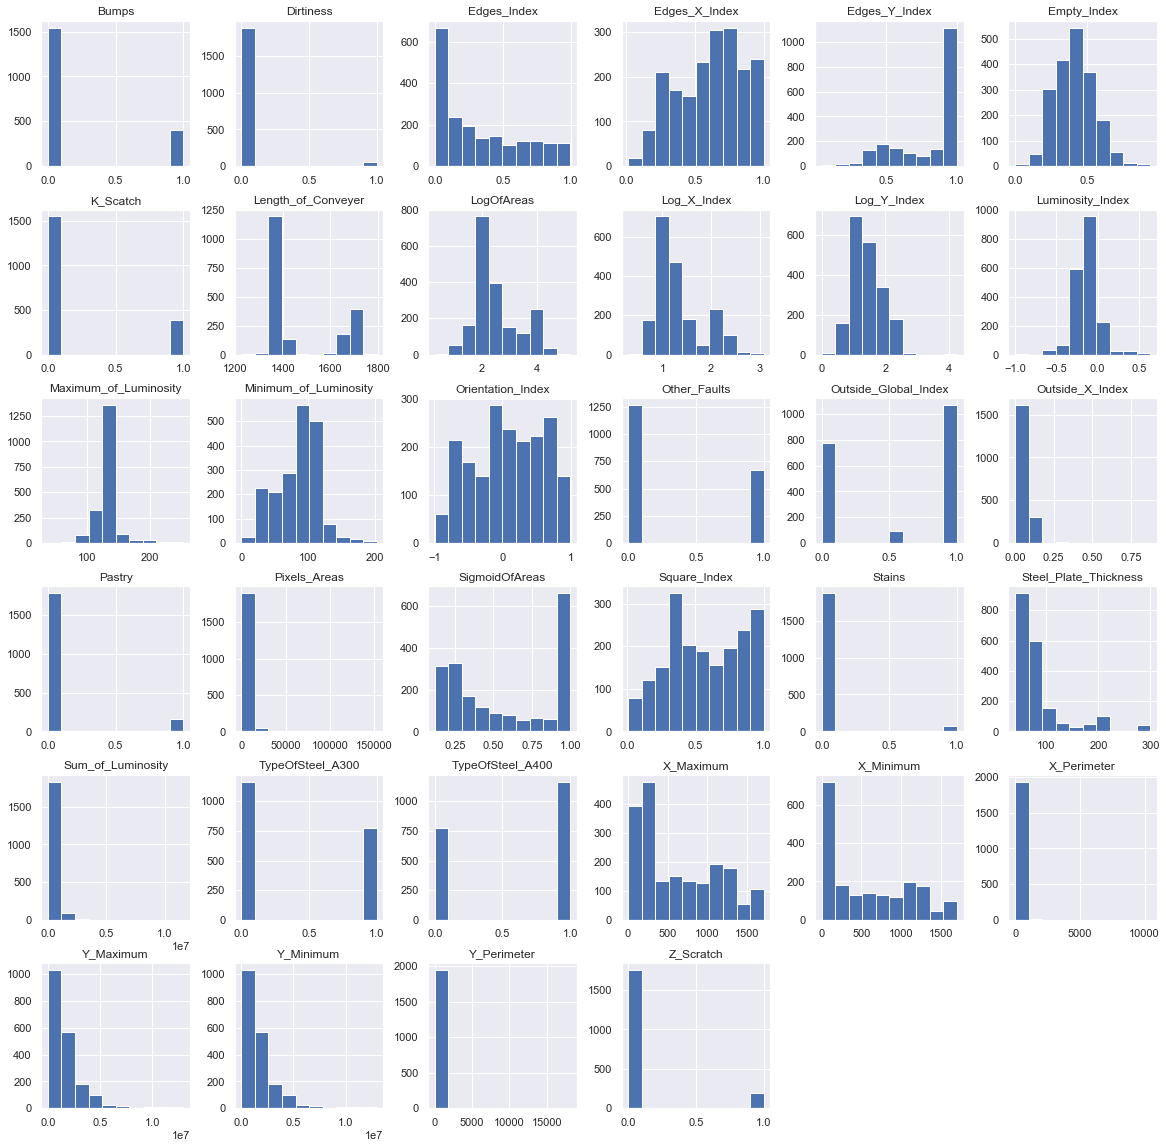

In [8]:
df.hist(figsize=(20,20))
plt.show()

In [9]:
X1 = df.values
y_dataframe =df[["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]]
features = X1[:,0:27]
x = pd.DataFrame(features)
y_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Pastry        1941 non-null   int64
 1   Z_Scratch     1941 non-null   int64
 2   K_Scatch      1941 non-null   int64
 3   Stains        1941 non-null   int64
 4   Dirtiness     1941 non-null   int64
 5   Bumps         1941 non-null   int64
 6   Other_Faults  1941 non-null   int64
dtypes: int64(7)
memory usage: 106.3 KB


In [10]:
y = []
for i in range(y_dataframe.shape[0]):
    if y_dataframe["Pastry"].values[i] == 1:
        y.append("Pastry")
    elif y_dataframe["Z_Scratch"].values[i] == 1:
        y.append("Z_Scratch")
    elif y_dataframe["K_Scatch"].values[i] == 1:
        y.append("K_Scatch")
    elif y_dataframe["Stains"].values[i] == 1:
        y.append("Stains")
    elif y_dataframe["Dirtiness"].values[i] == 1:
        y.append("Dirtiness")
    elif y_dataframe["Bumps"].values[i] == 1:
        y.append("Bumps")
    else:
        y.append("Other_Faults")
y=np.array(y)
y.shape

(1941,)

In [13]:
faultstype= pd.DataFrame({'faults':y})

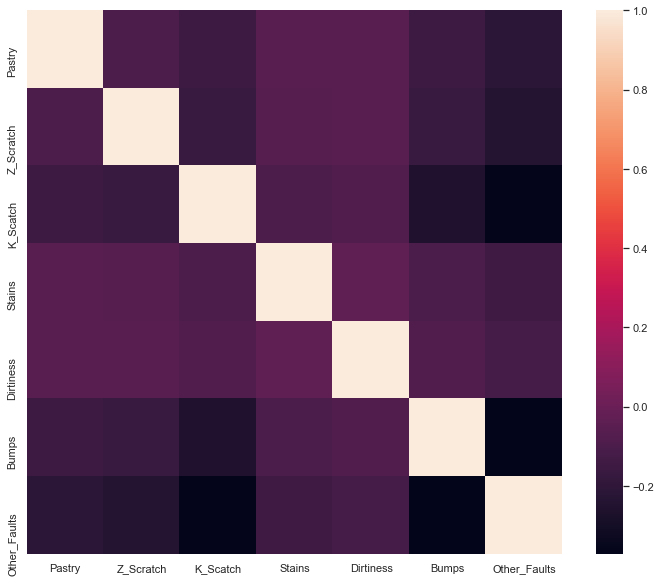

In [12]:
sns.set(rc={'figure.figsize':(12,10)})
corr = y_dataframe.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

Other_Faults    673
Bumps           402
K_Scatch        391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: faults, dtype: int64


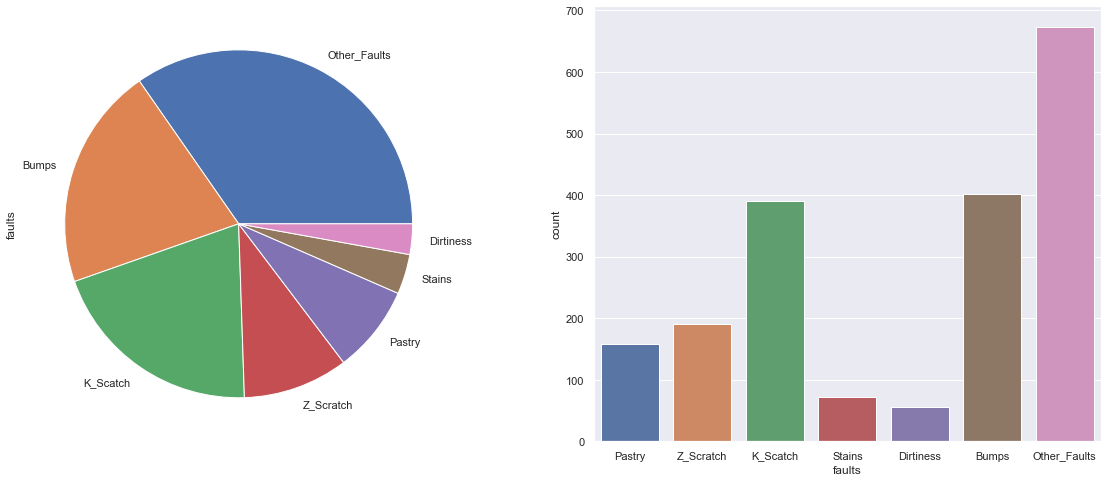

In [15]:
print(faultstype['faults'].value_counts())
fig, ax=plt.subplots(1,2,figsize=(20,8))

faultstype['faults'].value_counts().plot.pie(ax=ax[0])
sns.countplot(x='faults', data=faultstype, ax=ax[1])

<BarContainer object of 10 artists>

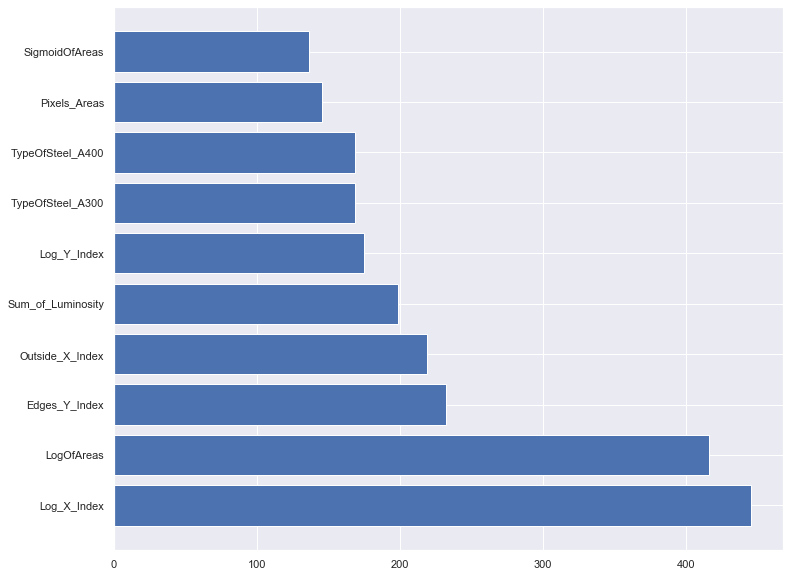

In [16]:
x_with_labels = df[df.columns[:27]]
select = SelectKBest(f_classif, k=10)
select.fit_transform(x_with_labels, y)
scores=list(select.scores_)
d = {'Score': scores, 'Feature': x_with_labels.columns};    df1=pd.DataFrame(d)
df1=df1.sort_values('Score',ascending=False)
l_features_sel=df1.Feature.tolist()[:10]
l_scores=df1.Score.tolist()[:10]
plt.barh(l_features_sel,l_scores, align='center')

## Machine-Learning

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [41]:
DecisionTree = DTC(max_depth=4)
DecisionTree.fit(x_train,y_train)
y_predictions_DTC = DecisionTree.predict(x_test)
accuracy_score(y_test, y_predictions_DTC)

0.6380655226209049

In [42]:
print(classification_report(y_test,y_predictions_DTC))

              precision    recall  f1-score   support

       Bumps       0.41      0.63      0.50       117
   Dirtiness       0.00      0.00      0.00        17
    K_Scatch       0.98      0.79      0.87       135
Other_Faults       0.57      0.62      0.59       238
      Pastry       0.00      0.00      0.00        42
      Stains       1.00      0.92      0.96        24
   Z_Scratch       0.80      0.88      0.84        68

    accuracy                           0.64       641
   macro avg       0.54      0.55      0.54       641
weighted avg       0.62      0.64      0.62       641



In [43]:
fn = list(df.columns[:27])
cn = list(df.columns[27:])
tree.export_graphviz(DecisionTree,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)

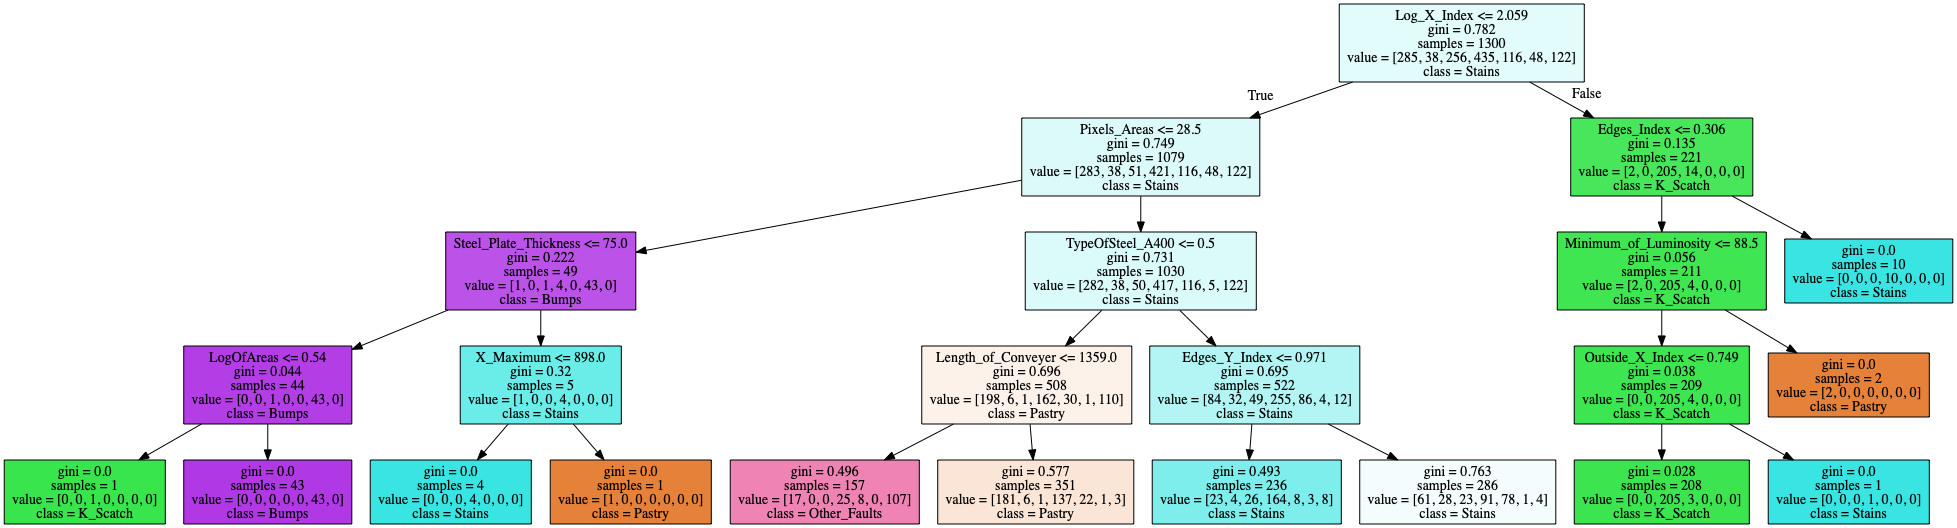

In [45]:
from IPython.display import Image
Image(filename='tree.png') 

In [38]:
RandomForest = RF()
RandomForest.fit(x_train,y_train)
y_predictions_RF = RandomForest.predict(x_test)
accuracy_score(y_test, y_predictions_RF)

0.8018720748829953

In [39]:
print(classification_report(y_test,y_predictions_RF))

              precision    recall  f1-score   support

       Bumps       0.68      0.70      0.69       117
   Dirtiness       0.78      0.82      0.80        17
    K_Scatch       0.98      0.95      0.96       135
Other_Faults       0.76      0.79      0.77       238
      Pastry       0.56      0.55      0.55        42
      Stains       1.00      0.92      0.96        24
   Z_Scratch       0.95      0.84      0.89        68

    accuracy                           0.80       641
   macro avg       0.81      0.79      0.80       641
weighted avg       0.81      0.80      0.80       641

